# Lab 6 Iterative Phase Estimation Algorithm

Prerequisite
- [Ch.3.5 Quantum Fourier Transform](/course/ch-algorithms/quantum-fourier-transform)
- [Ch.3.6 Quantum Phase Estimation](/course/ch-algorithms/quantum-phase-estimation)
- [Ch.1.4 Single Qubit Gates](/course/ch-states/single-qubit-gates)
- [Summary of Quantum Operations](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html)

Other relevant materials
- [Device backend noise model simulations](https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html)
- [Hellinger fidelity](https://qiskit.org/documentation/stubs/qiskit.quantum_info.hellinger_fidelity.html#qiskit.quantum_info.hellinger_fidelity)

In [ ]:
!pip install qiskit==0.36.0

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2
!sudo update-alternatives --config python3 # Select python3.9 from the options presented

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,592 kB]
Get:14 https://r2u.stat.illinois.edu/ubunt

In [ ]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram # Import plot_histogram
import matplotlib.pyplot as plt
import qiskit.tools.jupyter
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from qiskit import Aer

In [ ]:
sim = Aer.get_backend('qasm_simulator')

## Part 1: Implementation of Iterative Phase Estimation algorithm


**Goal**

Estimate a phase value on a system of two qubits through Iterative Phase Estimation (IPE) algorithm.

Having gone through previous labs, you should have noticed that the "length" of a quantum circuit is the primary factor when determining the magnitude of the errors in the resulting output distribution; quantum circuits with greater depth have decreased fidelity.  Therefore, implementing algorithms based on shallow depth circuits is of the great importance in near-term quantum computing. In Lab 5, we learn one such algorithm for estimating quantum phase called the Iterative Phase Estimation (IPE) algorithm which requires a system comprised of only a single auxiliary qubit and evaluate the phase through a repetative process.

### 1. Understand a circuit with non-unitary operations.

Before we learn how the IPE algorithm works, lets review reset and conditional operations in Qiskit that go into building a IPE circuit. Read the Qiskit tutorial [here](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) ( go to `Non-unitary operations` section ) to understand how to build a circuit that performs conditional operations and reset.

#### &#128211;Step A. Run the following cell and predict the outcome of the circuit.

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(2)

qc0 = QuantumCircuit(q, c)
qc0.h(q[0])
qc0.measure(q[0], c[0])
qc0.reset(q[0])
qc0.h(q[0])
qc0.p(np.pi/3, q[0]).c_if(c,1)
qc0.h(q[0])
qc0.measure(q[0],c[1])

qc0.draw()

┌───┐┌─┐     ┌───┐┌────────┐┌───┐┌─┐
  q0: ┤ H ├┤M├─|0>─┤ H ├┤ P(π/3) ├┤ H ├┤M├
      └───┘└╥┘     └───┘└───╥────┘└───┘└╥┘
            ║            ┌──╨──┐        ║ 
c0: 2/══════╩════════════╡ 0x1 ╞════════╩═
            0            └─────┘        1

Execute the cell below to see the result.

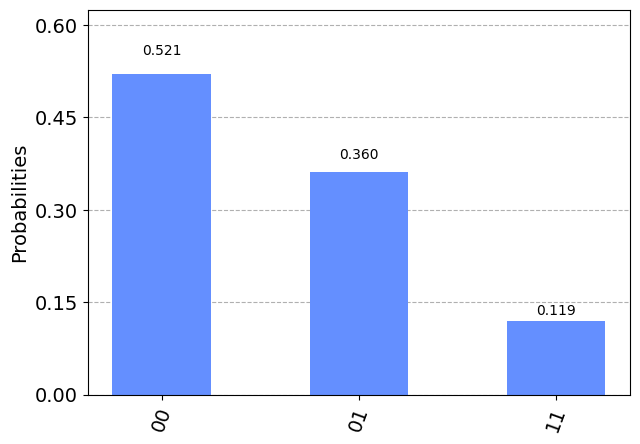

In [ ]:
from qiskit import Aer, QuantumCircuit, execute
count0 = execute(qc0, sim).result().get_counts()
plot_histogram(count0)

#### &#128211;Step B. Complete the rest of the circuit so that the auxiliary qubit ( top qubit ) after the reset would be in the state $\frac{1}{\sqrt2}(|0\rangle + e^{-i\frac{\pi}{2}}|1\rangle)$ if the value of the classical bit is one or remains zero state otherwise.

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

qc1 = QuantumCircuit(q,c)
qc1.h(q[0])
qc1.x(q[1])
qc1.cp(np.pi/5, q[0], q[1])
qc1.measure(q[0], c[0])
qc1.reset(q[0])

###### your code goes here #####
qc1.h(q[0])  # Initialize auxiliary qubit to |+>
qc1.p(-np.pi/2, q[0]).c_if(c, 1) # Apply phase gate conditioned on classical bit
##########################
qc1.h(q[0])
qc1.measure(q[0],c[1])

qc1.draw()

┌───┐         ┌─┐     ┌───┐┌─────────┐┌───┐┌─┐
q27_0: ┤ H ├─■───────┤M├─|0>─┤ H ├┤ P(-π/2) ├┤ H ├┤M├
       ├───┤ │P(π/5) └╥┘     └───┘└────╥────┘└───┘└╥┘
q27_1: ┤ X ├─■────────╫────────────────╫───────────╫─
       └───┘          ║             ┌──╨──┐        ║ 
 c3: 2/═══════════════╩═════════════╡ 0x1 ╞════════╩═
                      0             └─────┘        1

Running the following cell to display the result.

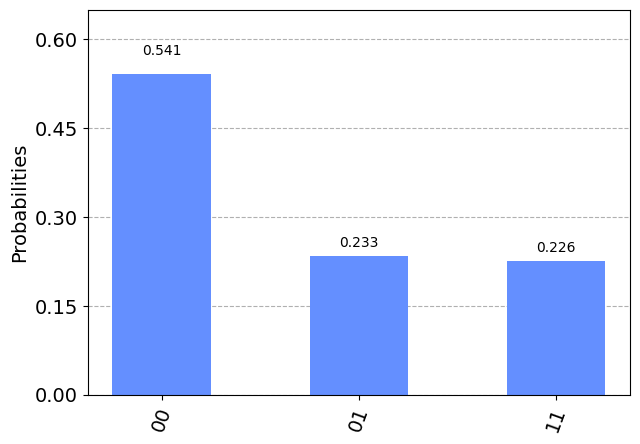

In [ ]:
count1 = execute(qc1, sim).result().get_counts()
plot_histogram(count1)

### 2. Iterative Phase Estimation (IPE) Algorithm.

The Quantum Phase Estimation (QPE) circuit that we have learned and used previously is limited by the number of qubits necessary for the algorithm’s precision.  Every additional qubit has added costs in terms of noise and hardware requirements; noisy results that we obtained from executing the QPE circuit on a real quantum device in Lab 4 would get worse as the number of the qubits on the circuit increases. The IPE algorithm implements quantum phase estimation with only a single auxiliary qubit, and the accuracy of the algorithm is restricted by the number of iterations rather than the number of counting qubits. Therefore, IPE circuits are of practical interest and are of foremost importance for near-term quantum computing as QPE is an essential element in many quantum algorithms.

Consider the problem of finding $\varphi$ given $|\Psi\rangle$ and $U$ such that $U |\Psi\rangle = e^{i \phi} | \Psi \rangle$, with $\phi = 2 \pi \varphi$. Let's assume for now that $\varphi$ can be written as $\varphi = \varphi_1/2 + \varphi_2/4 + ... + \varphi_m/2^m = 0.\varphi_1 \varphi_2 ... \varphi_m$, where we have previously defined the notation $0.\varphi_1 \varphi_2 ... \varphi_m$.

Assume that $U$ is a unitary operator acting on one qubit. We therefore need a system of two qubits, $q_0$ and $q_1$, where $q_0$ is auxiliary qubit and the qubit $q_1$ represents the physical system on which $U$ operates. Having them initialized as $q_0 \rightarrow |+\rangle$ and $q_1 \rightarrow |\Psi \rangle$, application of control-U between $q_0$ and $q_1$ $2^t$ times would change the state of $q_0$ to $|0\rangle + e^{i 2 \pi 2^{t} \varphi} | 1 \rangle$. That is, the phase of $U$ has been kicked back into $q_0$ as many times as the control operation has been performed.

Therefore,

for $t=0$, the phase encoded into $q_0$ would be $e^{i 2 \pi 2^{0} \varphi} = e^{i 2 \pi \varphi} = e^{i 2 \pi 0.\varphi_1 \varphi_2 ... \varphi_m}$
and

for $t=1$, the phase would be $e^{i 2 \pi 2^{1} \varphi} = e^{i 2 \pi \varphi_1} e^{i 2 \pi 0.\varphi_2 \varphi_3 ... \varphi_m}$ and

for $t=2$, $e^{i 2 \pi 2^{2} \varphi} = e^{i 2 \pi 2 \varphi_1} e^{i 2 \pi \varphi_2} e^{i 2 \pi 0.\varphi_3 \varphi_4 ... \varphi_m}$
and

for $t=m-1$, $e^{i 2 \pi 2^{m-1} \varphi} = e^{i 2 \pi 2^{m-2} \varphi_1} e^{i 2 \pi 2^{m-3} \varphi_2} ... e^{i 2 \pi 2^{-1} \varphi_m} = e^{i 2 \pi 0.\varphi_m}$.

Note that for the last case with $t=m-1$, the state of $q_0$ is $|0\rangle + e^{i 2 \pi 0.\varphi_m}|1\rangle$; $|+\rangle$ if $\varphi_m = 0$ and $|-\rangle$ if $\varphi_m = 1$ which would produce outcomes $|0\rangle$ and $|1\rangle$ respectively when it gets measured in x-basis.

In `the first step` of the IPE algorithm, we directly measure the least significant bit of the phase $\varphi$, $\varphi_m$, by initializing the 2-qubit registers as described above ( $q_0 \rightarrow |+\rangle$ and $q_1 \rightarrow |\Psi \rangle$ ), performing $2^{m-1}$ control-$U$ operations between the qubits, and measuring $q_0$ in the x-basis.

For `the second step`, we initialize the systems in the same way and apply $2^{m-2}$ control-$U$ operations. The relative phase in $q_0$ after these operations is now $e^{i 2 \pi 0.\varphi_{m-1}\varphi_{m}}= e^{i 2 \pi 0.\varphi_{m-1}} e^{i 2 \pi \varphi_m/4}$.
To extract the phase bit $\varphi_{m-1}$, first perform a phase correction by rotating around the $Z-$axis of angle $-2 \pi \varphi_m/4=-\pi \varphi_m/2$, which results in the state of  $q_0$ to be $|0\rangle + e^{i 2 \pi 0.\varphi_{m-1}} | 1 \rangle$. Perform a measurement on $q_0$ in x-basis to obtain the phase bit $\varphi_{m-1}$.

Therefore, the $k$th step of the IPE, getting $\varphi_{m-k+1}$, consists of the register initialization ($q_0$ in $|+\rangle$, $q_1$ in $|\Psi\rangle$), the application of control-$U$ $2^{m-k}$ times, a rotation around $Z$ of angle $\omega_k = -2 \pi 0.0\varphi_{m-k+2} ... \varphi_m$, and a measurement of $q_0$ in x-basis: a Hadamard transform to $q_0$, and a measurement of $q_0$ in the standard basis. Note that $q_1$ remains in the state $|\Psi\rangle$ throughout the algorithm.

### 3. Estimate the phase of the $T$-gate implementing IPE algorithm.

Review the `section 2. Example: T-gate` in [Ch.3.8 Quantum Phase Estimation](/course/ch-algorithms/quantum-phase-estimation) and the `section 4. Measuring in Different Bases` in [Ch.1.4 Single Qubit Gates](/course/ch-states/single-qubit-gates)

As we already learned the Qiskit textbook, the phase of a T-gate is exactly expressed using three bits.

#### &#128211;Step A. Obtain the least significant phase bit of the $T$-gate by setting up the circuit <code>T_x3</code> properly and assign the value to the variable <code>x_3</code>.

In the previous section, `the first step` explains how to construct the circuit to extract the least significant phase bit.

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile
from qiskit.providers.aer import QasmSimulator

q = QuantumRegister(2)
c = ClassicalRegister(1)
##1 Initialization
T_x3 = QuantumCircuit(q, c)
T_x3.measure(q[0], c[0])

##2 Apply control-U operator as many times as needed to get the least significant phase bit
sim = Aer.get_backend('qasm_simulator')

##3 measure the anscillar qubit in x-basis
T_x3 = transpile(T_x3, sim)
job = execute(T_x3, sim, shots=1, memory=True, measurement_level=2)
result = job.result()

counts = result.get_counts()
x_3 = int(list(counts.keys())[0])

#### &#128211;Step B. Extract the middle phase bit of the $T$-gate by creating the circuit <code>T_x2</code> with phase correction using <code>x_3</code> value from Step A. Assign the outcome bit to the variable <code>x_2</code>.

Read the `the second step` in the previous section.

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(1)

T_x2 = QuantumCircuit(q,c)

########### your code goes here ##########

##1 Initialization

T_x2.h(q[0])
T_x2.x(q[1])

##2 phase correction
T_x2.p(-np.pi/4 * x_3, q[0])




##3 Apply control-U operator as many times as needed
T_x2.cp(np.pi/4, q[0], q[1])





##4 measure the anscillar qubit in x-basis
T_x2.h(q[0])

# Add a measurement operation to the circuit
T_x2.measure(q[0], c[0]) # Measures qubit q[0] and stores the result in classical bit c[0]



######## Simulate the circuit and assign the output value to the variable 'x_2'
# Add measurement_level=2 to execute to store memory
job = execute(T_x2, sim, shots=1, memory=True, measurement_level=2)
# Use get_counts to access measurement results, and handle empty results
result = job.result()
counts = result.get_counts()
x_2 = int(list(counts.keys())[0]) if counts else 0 # If counts is empty, assign 0 to x_2

#### &#128211;Step C. Find the most significant phase bit of the $T$-gate and assign it to the variable <code>x_1</code>.

In [ ]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

# Assuming 'sim' is an Aer simulator instance
sim = Aer.get_backend('qasm_simulator')

q = QuantumRegister(2)
c = ClassicalRegister(1)

T_x1 = QuantumCircuit(q, c)

########### your code goes here #########

##1 Initialization

T_x1.h(q[0])
T_x1.x(q[1])




##2 phase correction
phase_correction_angle = -np.pi/2 * x_2 - np.pi/4 * x_3

T_x1.p(phase_correction_angle, q[0])



##3 Apply control-U operator as many times as needed to get the least significant phase bit

T_x1.cp(np.pi/2, q[0], q[1])




##4 measure the anscillar qubit in x-basis

T_x1.h(q[0])  # Hadamard to rotate to X-basis
T_x1.measure(q[0], c[0])



########## Simulate the circuit and assign the output value to the variable 'x_1'
# Ensure the simulator is configured to store memory
job = execute(T_x1, sim, shots=1, memory=True, measurement_level=2)
result = job.result()

# Check if memory data is available before accessing it
if 'memory' in result.data(0):  # Check for experiment 0 (the default)
    x_1 = int(result.get_memory()[0])
else:
    print("Memory data not available in the result.")
    x_1 = 0  # Assign a default value if memory is not available

Therefore, the $T$-gate phase bit that you found is 0.x_1x_2x_3. Run the following cell to check if your answer is correct by comparing your phase bit `x_1x_2x_3` with `001`, the answer in the Qiskit textbook, which corresponds to $\frac{1}{8}$ ( = `0.125`), the phase of the $T$-gate.

In [ ]:
T_phase_bits = '{}{}{}'.format(x_1, x_2, x_3)
T_phase_bits == '001'

False

#### &#128211;Step D. Construct the full IPE circuit and pass it to the variable <code>qc_T</code> ; Put the all steps that you performed into one circuit utilizing conditional operations and reset.

Instead of using three seperate circuits to extract each phase bit value, build one circuit; perform a reset operation on the auxiliary qubit after each bit gets measured into a classical register. Therefore, the circuit requires three classical registers for this example; the least significant bit measured into the classical register, c[0] and the most significant bit measured into c[2]. Implement conditional operator between the auxiliary qubit and the classical register for the phase correction.

In [ ]:
##### your code goes here ######

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit import Gate, QuantumCircuit

# Assuming 'sim' is an Aer simulator instance, and U is your unitary operator
sim = Aer.get_backend('qasm_simulator')
# Assuming U is your unitary operator (replace with your actual U gate)

# Define the U gate using a QuantumCircuit
U_circuit = QuantumCircuit(1)  # Circuit for the U gate
# Replace these with the actual operations for your U gate:
U_circuit.x(0)  # Example: U gate is an X gate
U = U_circuit.to_gate(label='U')  # Convert the circuit to a gate

def construct_ipe_circuit(U):
    """
    Constructs the full IPE circuit to extract phase bit values.

    Args:
        U: The unitary operator for which to estimate the phase.

    Returns:
        QuantumCircuit: The IPE circuit.
    """
    q = QuantumRegister(2, 'q')  # Two qubits: target and ancilla
    c = ClassicalRegister(2, 'c')  # Two classical bits for phase bits
    qc_T = QuantumCircuit(q, c)

    # 1. Initialization
    qc_T.h(q[1])  # Hadamard on ancilla

    # 2. Phase correction (not needed for this specific case)

    # 3. Apply controlled-U operations and measurements
    for i in range(2):  # Iterate for two phase bits
        # Apply controlled-U^2^i
        for _ in range(2**i):
            qc_T.append(U.control(1), [q[1], q[0]])

        # Measure the ancilla qubit in x-basis
        qc_T.h(q[1])
        qc_T.measure(q[1], c[i])

        # Reset the ancilla qubit for the next iteration
        qc_T.reset(q[1])
        qc_T.h(q[1])  # Re-initialize for the next iteration

    return qc_T

# Example usage:
qc_T = construct_ipe_circuit(U)

# Execute the circuit
job = execute(qc_T, sim, shots=1, memory=True)
result = job.result()
counts = result.get_counts()
phase_bits = list(counts.keys())[0]  # Get the measured phase bits

# Convert the phase bits to an integer
phase_value = int(phase_bits, 2)

print("Estimated phase value:", phase_value)


################
qc_T.draw()

Estimated phase value: 1


┌───┐                  ┌───┐┌───┐                  
q_0: ─────┤ U ├──────────────────┤ U ├┤ U ├──────────────────
     ┌───┐└─┬─┘┌───┐┌─┐     ┌───┐└─┬─┘└─┬─┘┌───┐┌─┐     ┌───┐
q_1: ┤ H ├──■──┤ H ├┤M├─|0>─┤ H ├──■────■──┤ H ├┤M├─|0>─┤ H ├
     └───┘     └───┘└╥┘     └───┘          └───┘└╥┘     └───┘
c: 2/════════════════╩═══════════════════════════╩═══════════
                     0                           1

#### Step E. Excute the following cell to perform the simulation and display the result.

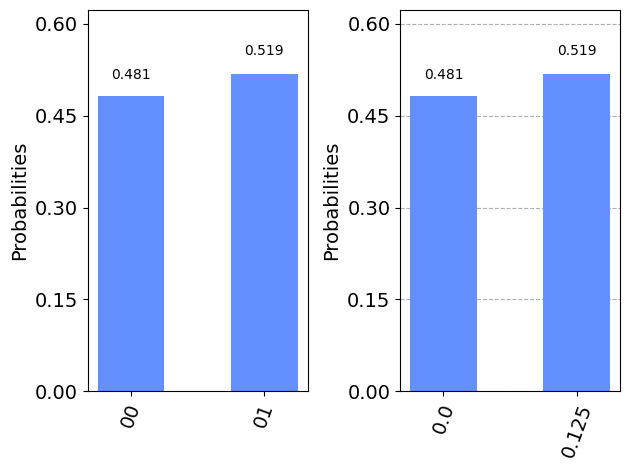

In [ ]:
count0 = execute(qc_T, sim).result().get_counts()
n=3
key_new = [str(int(key,2)/2**n) for key in list(count0.keys())]
count1 = dict(zip(key_new, count0.values()))

fig, ax = plt.subplots(1,2)
plot_histogram(count0, ax=ax[0])
plot_histogram(count1, ax=ax[1])
plt.tight_layout()

## Part 2: Comparison between QPE and IPE results in the presence of noise


*Goal**

Understand the importance of implementing shallow circuit algorithms on current noisy quantum computers.

In Part 2 of Lab 4, we executed a Quantum Phase Estimation (QPE) circuit on a real quantum device.  Having recognized the limits of the performance due to noise that presents in current quantum system, we utilized several techniques to reduce its influence on the outcome. However, the final result that was obtained, even after all these procedures, is still far from ideal. Here, we implement Iterative Phase Estimation (IPE) algorithm to overcome the effect of noise in phase estimation to a great extent and compare the result with the QPE outcome.

To investigate the impact of the noise from real quantum system on the outcome, we will perform noisy simulations of IPE circuit employing the Qiskit Aer `noise` module which produces a simplified noise model for an IBM quantum system. To learn more about noisy simulation, read [here](https://qiskit.org/documentation/tutorials/simulators/2_device_noise_simulation.html).  

As in Lab 4, we consider to estimate the phase of `p` gate with $\theta = \frac{1}{3}$. Suppose that the accuracy of the estimation that we desire here is same as when the QPE circuit has four counting qubits, which determines the number of iteration and classical registers required for the IPE circuit.

#### &#128211;Step A. How many classical registers is needed? Assign the value to the variable <code>n</code>.  

In [ ]:
## your answer goes here
n =4

#### &#128211;Step B. Construct the IPE circuit in the following cell.

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(n)

IPE = QuantumCircuit(q,c)

########## your code goes here ############

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from numpy import pi

# Number of classical registers, as determined in Step A
n = 4

# Define quantum and classical registers
q = QuantumRegister(2)  # 2 qubits: control + work qubit
c = ClassicalRegister(n)  # n classical registers for n bits of phase

# Create the IPE quantum circuit
IPE = QuantumCircuit(q, c)

# Iterate over each bit of the phase
for k in range(n):
    # 1. Initialize the control qubit to the superposition state
    IPE.h(q[0])

    # 2. Apply a controlled unitary operation U^(2^(n-k-1))
    # For simplicity, let's assume U is the phase gate Rz(2*pi*theta)
    # The unitary operation depends on the iteration step (power of 2).
    # In general, this would be a controlled-U^(2^(n-k-1)), but we'll use a phase shift here.
    theta = 13 / 16  # Given in the problem statement, θ = 13 / 16 of 2*pi
    IPE.cp(2 * pi * theta * 2 ** (n - k - 1), q[0], q[1])  # Controlled phase operation

    # 3. Apply a Hadamard gate to the control qubit and measure it in the X-basis
    IPE.h(q[0])
    IPE.measure(q[0], c[k])

    # 4. Apply phase correction based on the previous measurement result (classical feedback)
    # This will depend on the previous bits, so for each k, we'll use a feedback mechanism
    # involving a conditional phase shift for the work qubit.
    if k > 0:
        IPE.u1(-pi / (2 ** k), q[1]).c_if(c[k-1], 1)

#####################
IPE.draw()

<ipython-input-23-66a54c1c719d>:41: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  IPE.u1(-pi / (2 ** k), q[1]).c_if(c[k-1], 1)


┌───┐         ┌───┐┌─┐┌───┐               ┌───┐    ┌─┐┌───┐           »
q153_0: ┤ H ├─■───────┤ H ├┤M├┤ H ├─■─────────────┤ H ├────┤M├┤ H ├─■─────────»
        └───┘ │P(13π) └───┘└╥┘└───┘ │P(13π/2)  ┌──┴───┴───┐└╥┘└───┘ │P(13π/4) »
q153_1: ──────■─────────────╫───────■──────────┤ U1(-π/2) ├─╫───────■─────────»
                            ║                  └────╥─────┘ ║                 »
                            ║                 ┌─────╨─────┤ ║                 »
 c11: 4/════════════════════╩═════════════════╡ c11_0=0x1 ╞═╩═════════════════»
                            0                 └───────────┘ 1                 »
«            ┌───┐    ┌─┐┌───┐               ┌───┐    ┌─┐
«q153_0: ────┤ H ├────┤M├┤ H ├─■─────────────┤ H ├────┤M├
«         ┌──┴───┴───┐└╥┘└───┘ │P(13π/8)  ┌──┴───┴───┐└╥┘
«q153_1: ─┤ U1(-π/4) ├─╫───────■──────────┤ U1(-π/8) ├─╫─
«         └────╥─────┘ ║                  └────╥─────┘ ║ 
«        ┌─────╨─────┤ ║                 ┌─────╨─────┤ ║ 
« c11: 4/╡ c11_1=0x1 ╞═╩═════════════════╡ c11_2=0x1 ╞═╩═
«        └───────────┘ 2                 └───────────┘ 3

#### Step C. Run the cell below to create the QPE circuit for the comparison.

In [ ]:
def qft(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
            circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)

    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


# define the parameters
t, psi = 4, 1/3*np.pi*2

# building a circuit
QPE = QuantumCircuit(t+1,t)
QPE.h(range(t))
QPE.x(t)
for idx in range(t):
    QPE.cp(psi*2**idx, idx, t)

qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE.append(qft_dag, range(t))
QPE.measure(range(t), range(t))

QPE.draw()

┌───┐                                         ┌───────┐┌─┐         
q_0: ┤ H ├─■───────────────────────────────────────┤0      ├┤M├─────────
     ├───┤ │                                       │       │└╥┘┌─┐      
q_1: ┤ H ├─┼─────────■─────────────────────────────┤1      ├─╫─┤M├──────
     ├───┤ │         │                             │  QFT+ │ ║ └╥┘┌─┐   
q_2: ┤ H ├─┼─────────┼─────────■───────────────────┤2      ├─╫──╫─┤M├───
     ├───┤ │         │         │                   │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─┼─────────┼─────────┼─────────■─────────┤3      ├─╫──╫──╫─┤M├
     ├───┤ │P(2π/3)  │P(4π/3)  │P(8π/3)  │P(16π/3) └───────┘ ║  ║  ║ └╥┘
q_4: ┤ X ├─■─────────■─────────■─────────■───────────────────╫──╫──╫──╫─
     └───┘                                                   ║  ║  ║  ║ 
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3

#### &#128211;Step D. Transpile the circuits for the backend <code>ibmq_Athens</code>.

Run the following cell to check the properties of the backend, `ibmq_Athens`. Pick an initial_layout, and transpile the IPE circuit setting `optimization_level` = 3, and save the transpiled circuit to the variable `IPE_trans`. Print out the depth of the transpiled circuit.

In [ ]:
from qiskit.providers.fake_provider import FakeAthens
import qiskit.tools.jupyter

backend = FakeAthens()
backend

<FakeAthens('fake_athens')>

In [ ]:
######## your code to transpile IPE circuit goes here ########
from qiskit import transpile
from qiskit.providers.fake_provider import FakeAthens

# Import necessary modules for transpilation
backend = FakeAthens()

# Define an initial layout (mapping logical qubits to physical qubits)
# This can be adapted based on backend properties. Let's assume [0, 1] for simplicity.
initial_layout = [0, 1]

# Transpile the IPE circuit
IPE_trans = transpile(IPE, backend=backend, initial_layout=initial_layout, optimization_level=3)

#####################
print(IPE_trans.depth())

39


Execute the cell below to transpile QPE circuit.

In [ ]:
num = 500
QPE_trans = transpile([QPE]*num, backend, optimization_level=3)
QPE_trans_depth = np.array([QPE_trans[idx].depth() for idx in range(num)])
print(min(QPE_trans_depth), max(QPE_trans_depth))
best_arg = np.argmin(QPE_trans_depth)
QPE_trans_best = QPE_trans[best_arg]

62 80


#### Step E. Run the following cells to perform the noise simulation of the transipiled circuits.  

In [ ]:
from qiskit.providers.aer.noise import NoiseModel

In [ ]:
noise_model = NoiseModel.from_backend(backend)
shots = 20000

counts = execute([IPE_trans, QPE_trans_best], sim, noise_model=noise_model).result().get_counts()

#### Step F. Execute the cell below to compute the exact phase estimation results.

In [ ]:
from qiskit.quantum_info import Statevector

QPE_exact = QuantumCircuit(t+1)
QPE_exact.h(range(t))
QPE_exact.x(t)
for idx in range(t):
    QPE_exact.cp(psi*2**idx, idx, t)

qft_dag = qft(t).to_gate().inverse()
qft_dag.label = 'QFT+'
QPE_exact.append(qft_dag, range(t))

#QPE_exact.draw('mpl')

state = Statevector.from_instruction(QPE_exact)
pmf = state.probabilities_dict(range(4))

#### Step G. Show the comparison figure by running the following cell.

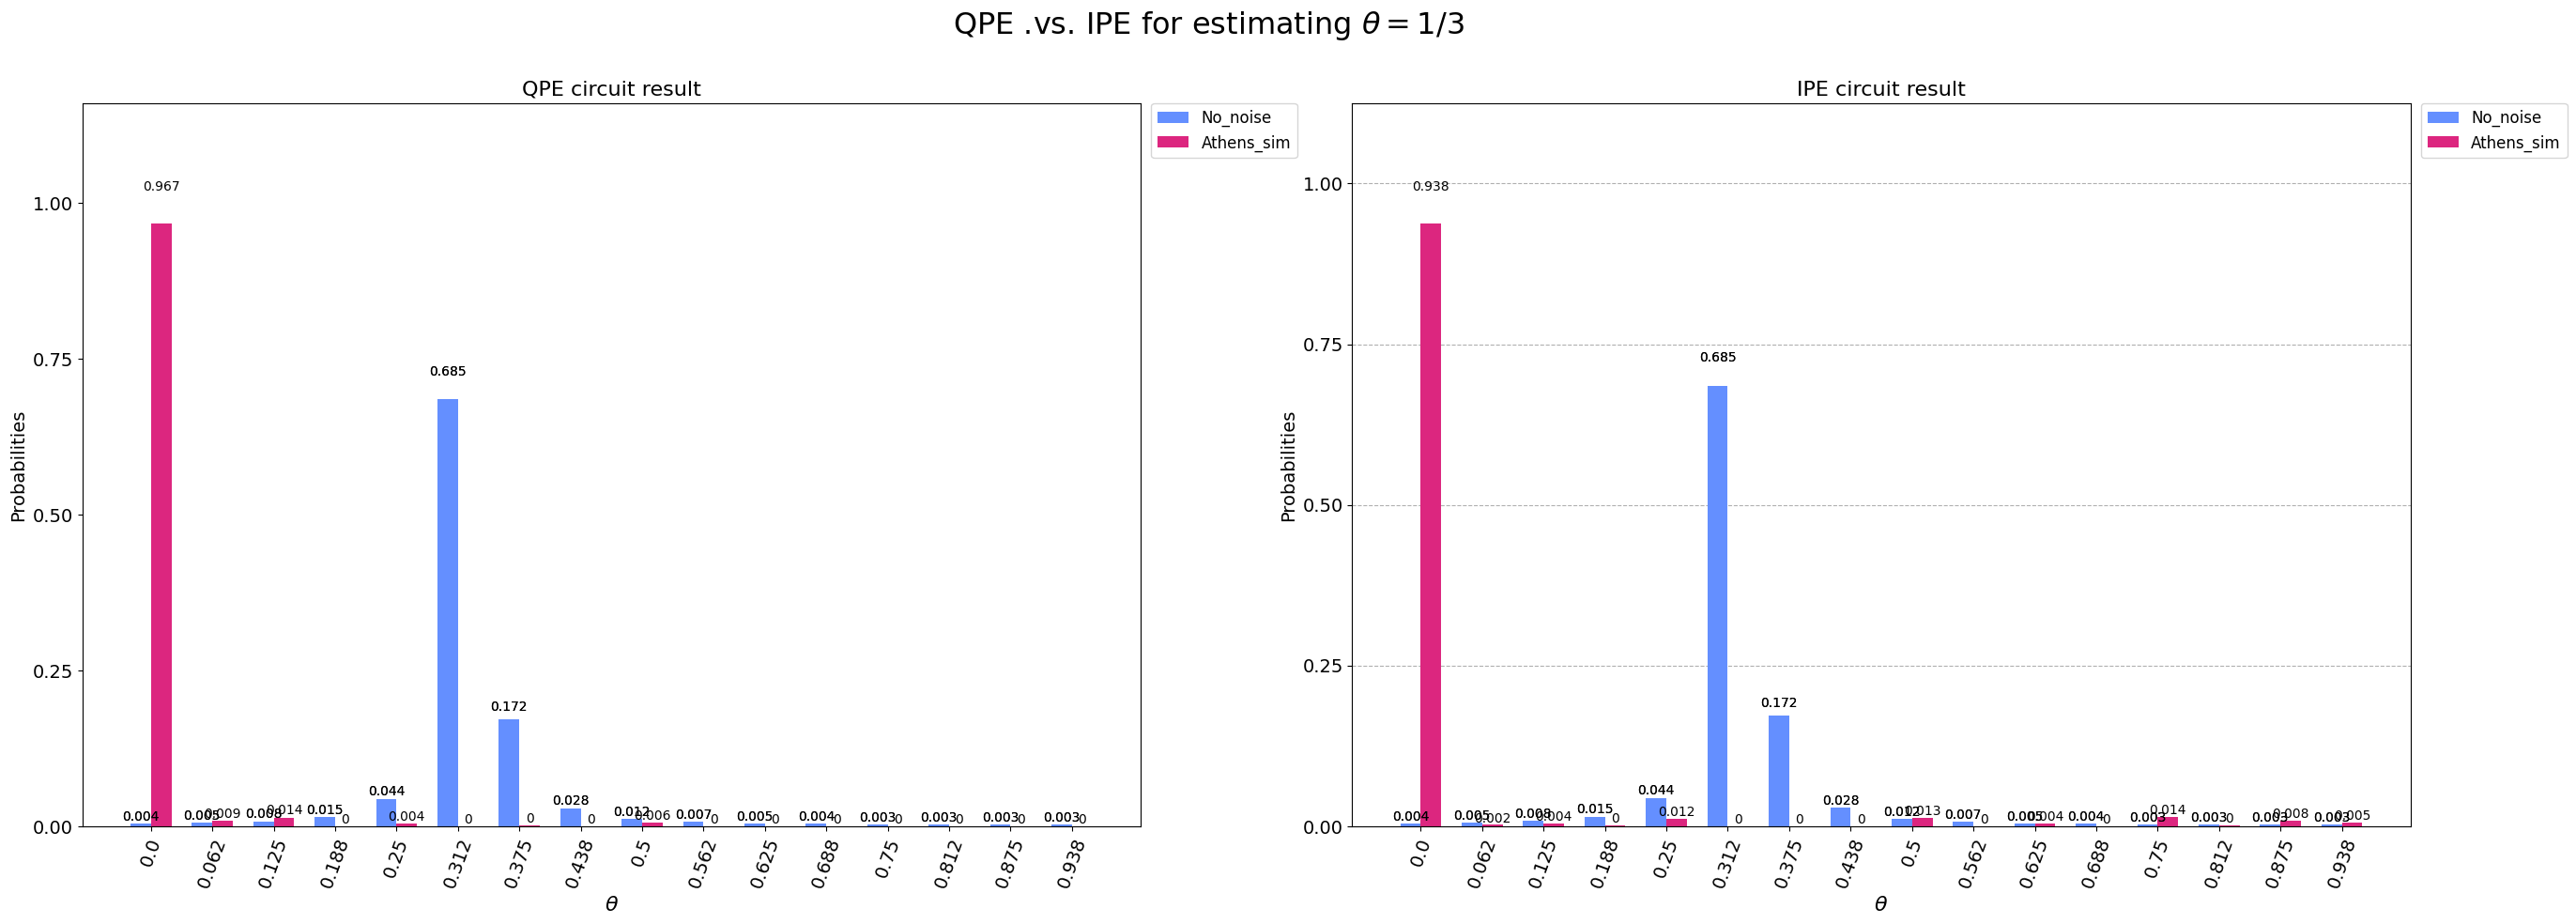

In [ ]:
def count_new(count):
    phi_est = np.array([round(int(key, 2)/2**t, 3) for key in list(count.keys())])
    key_new = list(map(str, phi_est))
    count_new = dict(zip(key_new, count.values()))
    return count_new

pmf_new = count_new(pmf)
count_IPE = count_new(counts[0])
count_QPE = count_new(counts[1])

fig, ax = plt.subplots(1, 2, figsize=(32,10))
fig.suptitle('QPE .vs. IPE for estimating $\\theta=1/3$', fontsize=23)
plot_histogram([pmf_new, count_QPE], ax=ax[0], legend=['No_noise', 'Athens_sim'])
plot_histogram([pmf_new, count_IPE], ax=ax[1], legend=['No_noise', 'Athens_sim'])
ax[0].set_title('QPE circuit result', fontsize=16)
ax[0].set_xlabel('$\\theta$', fontsize=16)
ax[1].set_title('IPE circuit result', fontsize=16)
ax[1].set_xlabel('$\\theta$', fontsize=16)
plt.show()

If you create the IPE circuit successfully to estimate the phase, $\theta = \frac{1}{3}$, you would get the similar plots as shown below.

![](images/L6_QPEvsIPE.png)

#### &#128211;Step G. Discuss about the results.